# Upsampling the Datastream for Modulation

There are two possible means to upsample the datastream for modulation: a legacy method using Gaussian smoothing, and a (yet to be implemented) method using raised cosine filters that should be preferred once it is available. Both methods append a null symbol at the ends of the message to allow the modulated output to smoothly fade in and out.

In [1]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

## Gaussian Smoothed Upsampling (Legacy)

The signal is upsampled by extending the previous sample, and then smoothed using a Gaussian filter. The parameters of this filter are determined as described in [the Gaussian parameters notebook](Pre-Modulation Gaussian Smoothing.ipynb).

In [3]:
raw_window=signal.windows.gaussian(53, 8.664) # See the other notebook for parameter origins
gaussian_window=raw_window/np.sum(raw_window)

In [4]:
orig_time=np.linspace(0,8,9)
orig_data=np.asarray([0,1,0,-1,0,1,0,-1,0])
interp_time=np.linspace(0,8,801)
interp_data=interp1d(orig_time,orig_data,"previous",fill_value=0)(interp_time)
smoothed_data=signal.convolve(interp_data,gaussian_window,"same",method="fft")

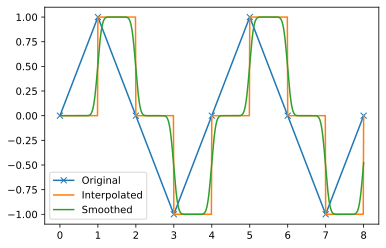

In [5]:
plt.plot(orig_time, orig_data, marker="x")
plt.plot(interp_time, interp_data, interp_time, smoothed_data)
plt.legend(["Original", "Interpolated", "Smoothed"])
plt.show()

## Raised Cosine Filters